# Notes on Zipfs Law

Zipf's law regularly hits the frontpage of HN [0, 1], and quite a few commentors talked about random words, and if they follow Zipfs law / power distribution.

It has been known for at least 3 decades, that randomly generated corpus of text follows Zipf's law closely, when Li (1992) showed this mathematically.

Now a days there is easy access to large corpora of texts and machines can easily chew through megabytes of texts, so it is quite easy to try out Zipfs law on your own. It is also easy to generate vast amounts of random text to test the hypothesis.

- [0] https://news.ycombinator.com/item?id=31636422
- [1] https://news.ycombinator.com/item?id=29171588

In [1]:
import urllib, re, random
from collections import Counter
from matplotlib import pyplot as plt
from statistics import mean

In [2]:
def loglog_corpus(corpus, title=None):
    counts = [el[1] for el in corpus.most_common()]
    ranks = range(1, len(counts)+1)
    
    plt.loglog(ranks, counts, '.' , label="observed")
    
    k = mean(f*r for f, r in zip(counts, ranks))
    plt.loglog(ranks, [k/r for r in ranks], label=f"mean f*r, {k=:.1f}")
    k = sum(counts)
    plt.loglog(ranks, [(k*0.1)/r for r in ranks], label=f"k for C=0.1 k={k*0.1:.1f}")
    plt.loglog(ranks, [(k*0.04)/r for r in ranks], label=f"k for C=0.04, k={k*0.04:.1f}")
    
    plt.ylabel("token count")
    plt.xlabel("Rank")
    plt.legend()
    if title:
        plt.title(title)

In [3]:
def corpus_stats(counter):
    tokens = sum(counter.values())
    words = len(counter)
    print("Total tokens:      {:9,}".format(tokens))
    print("Total words:       {:9,}".format(words))
    print("token/word ratio : {:12.2f} (mean word count)".format(words/tokens*100))

# Zipf law and choice of parameters

Zipf's law is a type of _power distribution_. On a log-log plot, we expect a power distribution, to be a straight line, with a negative slope. 

According to Zipf's finding, the slope is -1 in loglog-space for word-counts in English, and has been shown to be unchanged for other languages (Li 1992)

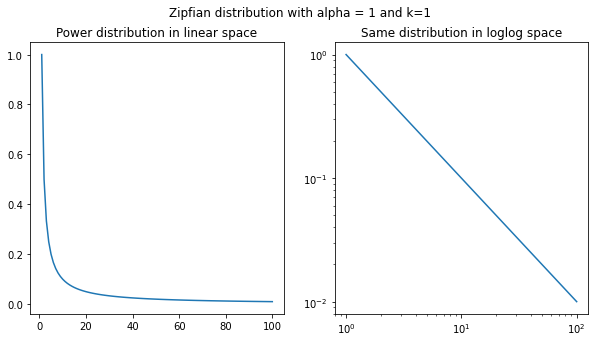

In [4]:
xs = range(1,101)
ys = [1/x for x in xs]
plt.subplots(1,2, figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(xs, ys)
plt.title("Power distribution in linear space")

plt.subplot(1,2,2)
plt.loglog(xs, ys)
plt.title("Same distribution in loglog space")
plt.suptitle("Zipfian distribution with alpha = 1 and k=1")
plt.show()

Zipf's law is usually interpreted as either in terms of of frequencies

Manning et. al (1999, p24) defines Zipf law in terms of rank $r$ and token frequencies $f$ with a constant $k$ that can be used to calculate the frequency of a word, given its rank:

$$ f \propto \frac{1}{r} \Rightarrow f  \times r=k \Rightarrow f = \frac{k}{r} $$

But doesn't give us a way to estimate $k$. 

A simple way to estimate $k$ is to take the mean of the product of observed frequencies and rank.

$$ E(k) = \frac{1}{n}\sum_{1}^{n} f_n \times r_n $$

Li (1992) shows Zipfs law defined by probabilities:

$$ P(r) = \frac{C}{r^{\alpha}} $$

The _probability_ of a word of a given rank is equal to a constant C divided by that rank to a power another constant, alpha. If we look at the loglog-space above, $ log{C} $ is the intercept and $-\alpha$ is the slope (Li 2002).

Li goes on to say that empirically it has been shown that $ C \approx 0.1 $ and $ \alpha \approx 1 $ for natural languages. Li then shows that for artificial, random languages with 26 symbols, $ C = 0.04 $

We can move between probability space and frequency space, by multiplying. Thus, if we _know_ that $ C = 0.4 $ for a given corpus (like, say, the English language), we can mulitply the entire probability space (the sum of tokens of our sample, e.g. a book) by 0.4 to get the quivelant $k$.

## Real world corpora

In [5]:
# Download and prepare corpora
corpora_url = [
    ("https://www.gutenberg.org/files/11/11-0.txt", "Alice in Wonderlands"),
    ("https://www.gutenberg.org/files/1342/1342-0.txt", "Pride and Prejudice"),
    ("https://www.gutenberg.org/files/2701/2701-0.txt", "Moby-Dick"),
    ("https://www.gutenberg.org/files/2600/2600-0.txt", "War & Peace"),
    ("https://www.gutenberg.org/files/74/74-0.txt", "Tom Sawyer"),
    ("https://www.gutenberg.org/ebooks/4791.txt.utf-8", "Voyage au centre de la Terre")
]
# Remove none-alphabet characters and split on space and new lines
corpora = {name: Counter(re.sub(r'[^a-z \n]', '', urllib.request.urlopen(url).read().decode('utf-8').lower()).split()) 
           for url, name in corpora_url}

Alice in Wonderlands
--------------------
Total tokens:         29,492
Total words:           3,199
token/word ratio :        10.85 (mean word count)

Pride and Prejudice
-------------------
Total tokens:        124,579
Total words:           7,001
token/word ratio :         5.62 (mean word count)

Moby-Dick
---------
Total tokens:        215,436
Total words:          19,962
token/word ratio :         9.27 (mean word count)

War & Peace
-----------
Total tokens:        565,654
Total words:          20,324
token/word ratio :         3.59 (mean word count)

Tom Sawyer
----------
Total tokens:         73,815
Total words:           8,615
token/word ratio :        11.67 (mean word count)

Voyage au centre de la Terre
----------------------------
Total tokens:         68,447
Total words:          10,799
token/word ratio :        15.78 (mean word count)



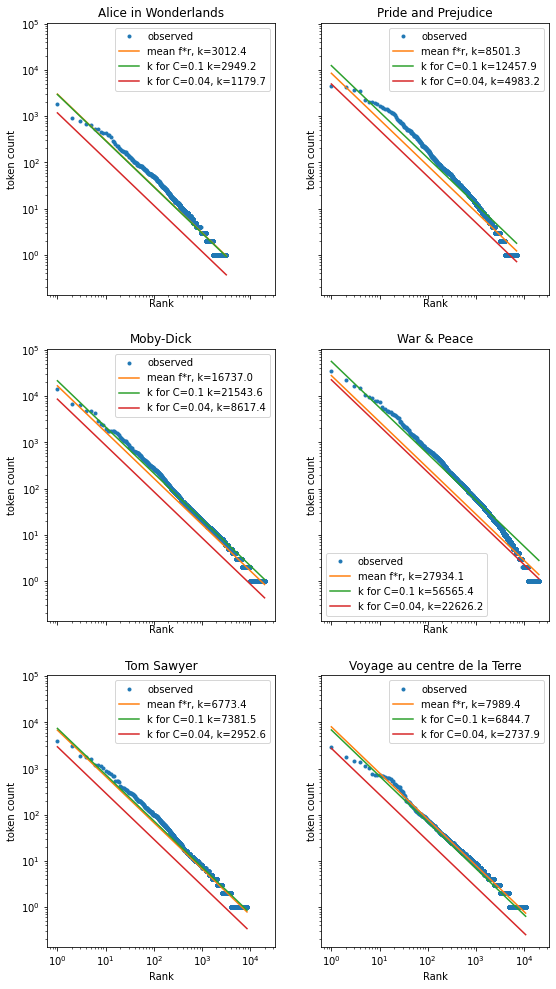

In [6]:
plt.subplots(3, 2, figsize=(9, 17), sharey=True, sharex=True)
for i, (name, c) in enumerate(corpora.items(), start=1):
    print(name)
    print('-'*len(name))
    corpus_stats(c)
    print()
    plt.subplot(3, 2, i)
    loglog_corpus(c, name)

Total tokens:      1,077,423
Total words:          43,961
token/word ratio :         4.08 (mean word count)


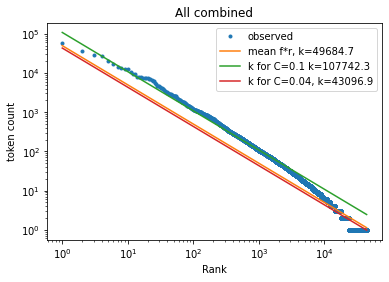

In [7]:
corpus_nat = sum(corpora.values(), Counter())
corpus_stats(corpus_nat)
loglog_corpus(corpus_nat, "All combined")

## Randomly generated corpus

> As a final remark on Zipf’s law, we note that there is a debate on how surprising and interesting Zipf’s law and ‘power laws’ in general are as a description of natural phenomena. It has been argued that randomly generated text exhibits Zipf’s law (Li 1992).

>To show this, we construct a generator that randomly characters from the 26 letters of the alphabet and the blank (that is, each of these 27 symbols has an equal chance of being generated next). Simplifying slightly, the probability of a word of length n being generated is the probability of generating a non-blank character n times and the blank after that. One can show that the words generated by such a generator obey a power law of the form Mandelbrot suggested. 

*Manning, et. al. 1999*

In [8]:
corpus_artificial = Counter(''.join(random.choices("qwertyuiopasdfghjklzxcvbnm ", k=50_000_000)).split())

Total tokens:      1,783,156
Total words:       1,606,118
token/word ratio :        90.07 (mean word count)


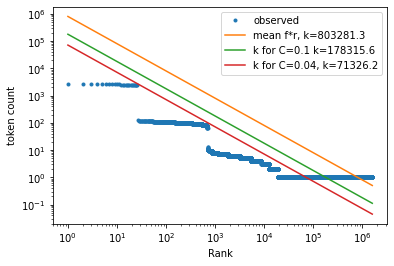

In [9]:
corpus_stats(corpus_artificial)
loglog_corpus(corpus_artificial)

Li (1992) notes that since the probability of any 2 equal-length words are the same, we can expect, and indeed see in the graph above, that the frequencies for our artificial corpus has "steps" in it.

However, it is _very_ difficult to see from the graph that this is supposed to follow a power distribution.

Li concludes that the power distribution arises, not from some inherent property of natural language, but from representing frequencies as a function of rank.

> In conclusion, Zipf's law is not a deep law in natural language as one might first have
thought. It is very much related the particular representation one chooses, i.e., rank as
the independent variable.

## Resources
---

### Bibliography
1. [Manning et. al 1999](https://icog-labs.com/wp-content/uploads/2014/07/Christopher_D._Manning_Hinrich_Sch%C3%BCtze_Foundations_Of_Statistical_Natural_Language_Processing.pdf): Manning, Christopher, and Hinrich Schutze. Foundations of statistical natural language processing. MIT press, 1999.
2. [Li 1992](http://115.28.82.164/sites/default/files/test%20pdf1.pdf): Li, Wentian. "Random texts exhibit Zipf's-law-like word frequency distribution." IEEE Transactions on information theory 38.6 (1992): 1842-1845.
3. [Li 2002](https://www.researchgate.net/profile/Wentian-Li/publication/253290454_Zipf's_Law_Everywhere/links/5cf59ef9299bf1fb185617ff/Zipfs-Law-Everywhere.pdf): Li, Wentian. "Zipf's Law everywhere." Glottometrics 5.2002 (2002): 14-21.

### See also
- [The Good Research Handbook: A sample project: Zipf’s law](https://goodresearch.dev/zipf.html)
- [Research Software Engineering with Python, Chapter 7.3](https://merely-useful.tech/py-rse/git-advanced.html#git-advanced-theory )